In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from  different_methods import pick_hyperbolic_coords, convert_to_half_plane_hyperbolic, is_in_fundamental_domain,\
map_disk_to_hp


# 利用双曲测度生成大范围内均匀的点

In [ ]:
def map_hp_to_disk(z_hp):
    """
    【新增】将上半平面(HP)的点映射到庞加莱圆盘(Disk)的点。
    这是 z_hp = i * (1 + z_disk) / (1 - z_disk) 的逆变换。
    """
    return (z_hp - 1j) / (z_hp + 1j)

def plot_poincare_disk(r, theta, R_hyperbolic, ax):
    """
    【新增】绘制庞加莱圆盘内的点及基本域边界。
    """
    # 1. 绘制生成的随机点
    # 将双曲极坐标 (r, theta) 转换为庞加莱圆盘内的笛卡尔坐标
    radius_disk = np.tanh(r / 2)
    x_disk = radius_disk * np.cos(theta)
    y_disk = radius_disk * np.sin(theta)
    ax.scatter(x_disk, y_disk, s=1, alpha=0.3, label=f'{len(r)} Generated Points')

    # 2. 绘制圆盘的边界
    # 绘制单位圆（庞加莱圆盘的绝对边界）
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', label='Poincaré Disk Boundary (|z|=1)')
    ax.add_artist(unit_circle)
    # 绘制我们实际的采样圆盘边界
    sampling_radius = np.tanh(R_hyperbolic / 2)
    sampling_circle = plt.Circle((0, 0), sampling_radius, color='green', fill=False, label=f'Sampling Disk (R={R_hyperbolic})')
    ax.add_artist(sampling_circle)
    
    # 3. 【关键需求】绘制基本域 F 在圆盘模型中的边界
    # 我们需要将上半平面中的边界点一一映射过来
    # 边界 1: Re(z) = 0.5, y from sqrt(3)/2 to infinity
    y_vals = np.logspace(np.log10(np.sqrt(3)/2), 5, 500) # 用对数间隔在高y值处更密集
    hp_boundary1 = 0.5 + 1j * y_vals
    disk_boundary1 = map_hp_to_disk(hp_boundary1)
    ax.plot(disk_boundary1.real, disk_boundary1.imag, 'r', linewidth=2, label='Fundamental Domain Boundary')
    
    # 边界 2: Re(z) = -0.5
    hp_boundary2 = -0.5 + 1j * y_vals
    disk_boundary2 = map_hp_to_disk(hp_boundary2)
    ax.plot(disk_boundary2.real, disk_boundary2.imag, 'r', linewidth=2)
    
    # 边界 3: |z| = 1, from angle pi/3 to 2pi/3
    angles = np.linspace(np.pi / 3, 2 * np.pi / 3, 200)
    hp_boundary3 = np.exp(1j * angles)
    disk_boundary3 = map_hp_to_disk(hp_boundary3)
    ax.plot(disk_boundary3.real, disk_boundary3.imag, 'r', linewidth=2)

    # 4. 设置图表样式
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_title('Step 1: Points Generated in the Poincaré Disk Model')
    ax.set_xlabel('Re(z_disk)')
    ax.set_ylabel('Im(z_disk)')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)


开始生成 100000 个随机点...
使用采样半径 R = 10

【步骤 1】正在绘制庞加莱圆盘内的初始点分布图...


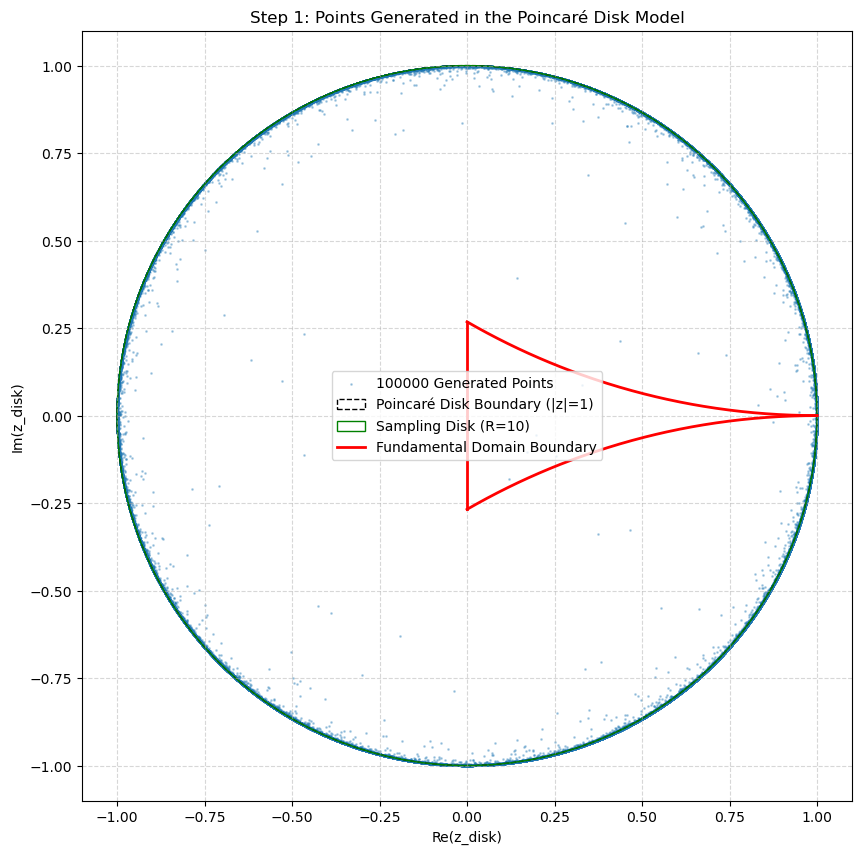


【步骤 2】将点变换到上半平面并执行区域排除法...
------------------------------
初始生成 100000 个点。
其中 5 个点在基本域内被剔除。
最终获得 99995 个基本域外的点。
总耗时: 0.6725 秒。
------------------------------

【步骤 3】正在绘制上半平面中的最终点分布图...


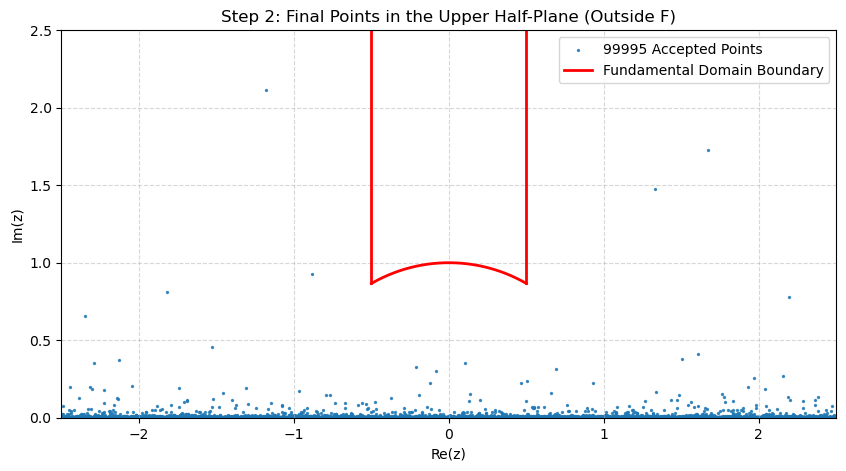

In [ ]:

# --- 1. 参数设置 ---
NUM_POINTS_TO_GENERATE = 100000
R_hyperbolic = 10

print(f"开始生成 {NUM_POINTS_TO_GENERATE} 个随机点...")
print(f"使用采样半径 R = {R_hyperbolic}")

t_start = time.time()

# --- 2. 生成双曲坐标点 ---
# 我们只需要生成一次，然后用于两个图
r_coords, theta_coords = pick_hyperbolic_coords(R_hyperbolic, NUM_POINTS_TO_GENERATE)

# --- 3. 【新增】可视化第一步：庞加莱圆盘 ---
print("\n【步骤 1】正在绘制庞加莱圆盘内的初始点分布图...")
fig1, ax1 = plt.subplots(figsize=(10, 10))
plot_poincare_disk(r_coords, theta_coords, R_hyperbolic, ax1)
plt.show()

# --- 4. 核心算法：区域排除法 ---
print("\n【步骤 2】将点变换到上半平面并执行区域排除法...")

points_outside_F = []
# (为了简化，我们这里假设拒绝率极低，直接用生成的点进行筛选)
# a. 将点转换到上半平面
z_candidates = convert_to_half_plane_hyperbolic(r_coords, theta_coords)
# b. 检查哪些点在基本域内
mask_inside = is_in_fundamental_domain(z_candidates)
# c. 保留外部的点
final_points = z_candidates[~mask_inside]

t_end = time.time()

print("-" * 30)
# 计算实际接受了多少点
accepted_count = len(final_points)
rejected_count = NUM_POINTS_TO_GENERATE - accepted_count
print(f"初始生成 {NUM_POINTS_TO_GENERATE} 个点。")
print(f"其中 {rejected_count} 个点在基本域内被剔除。")
print(f"最终获得 {accepted_count} 个基本域外的点。")
print(f"总耗时: {t_end - t_start:.4f} 秒。")
print("-" * 30)

# points_to_print = final_points[:100]
# for i, point in enumerate(points_to_print):
#     # 使用格式化字符串打印，序号占3位，右对齐
#     print(f"{i+1:3d}: {point.real:.5f}{point.imag:+.10f}j")
# --- 5. 可视化第二步：上半平面 ---
print("\n【步骤 3】正在绘制上半平面中的最终点分布图...")
fig2, ax2 = plt.subplots(figsize=(10, 10))

ax2.scatter(final_points.real, final_points.imag, s=2, alpha=0.8, label=f'{len(final_points)} Accepted Points')

# 绘制基本域的边界作为参考
y_line_hp = np.linspace(np.sqrt(3)/2, R_hyperbolic, 200)
ax2.plot(-0.5 * np.ones_like(y_line_hp), y_line_hp, 'r', linewidth=2)
ax2.plot(0.5 * np.ones_like(y_line_hp), y_line_hp, 'r', linewidth=2)
theta_arc_hp = np.linspace(np.pi / 3, 2 * np.pi / 3, 200)
ax2.plot(np.cos(theta_arc_hp), np.sin(theta_arc_hp), 'r', linewidth=2, label='Fundamental Domain Boundary')

ax2.set_xlim(-2.5, 2.5)
ax2.set_ylim(0, 2.5)
ax2.set_aspect('equal', adjustable='box')
ax2.set_title(f'Step 2: Final Points in the Upper Half-Plane (Outside F)')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.show()




# 在整个庞加莱圆盘上用欧几里得测度均匀取点，然后映射到上半平面

In [8]:
from different_methods import sample_disk_euclidean, map_disk_to_hp

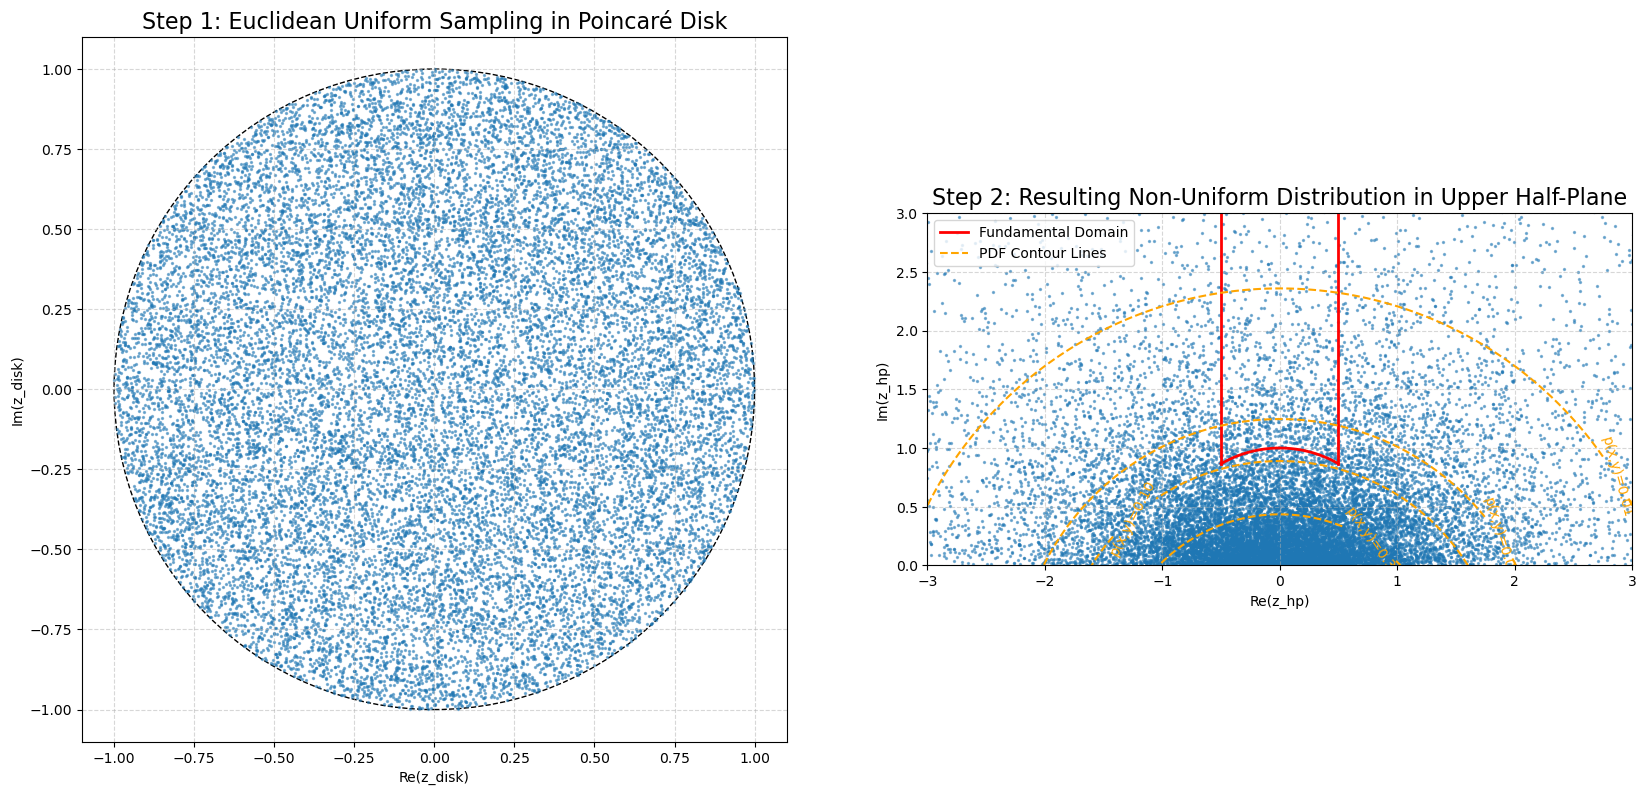

In [9]:
# --- 主程序 ---


NUM_POINTS = 20000  # 生成2万个点以便清晰观察

# --- 1. 在庞加萊圆盘上进行欧几里得均匀采样 ---
z_in_disk = sample_disk_euclidean(NUM_POINTS)

# --- 2. 将这些点变换到上半平面 ---
z_in_hp = map_disk_to_hp(z_in_disk)

# --- 3. 可视化对比 ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# --- 左图：庞加萊圆盘上的欧几里得均匀点 ---
ax1.set_title('Step 1: Euclidean Uniform Sampling in Poincaré Disk', fontsize=16)
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax1.add_artist(unit_circle)
ax1.scatter(z_in_disk.real, z_in_disk.imag, s=2, alpha=0.5)
ax1.set_aspect('equal', adjustable='box')
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xlabel('Re(z_disk)')
ax1.set_ylabel('Im(z_disk)')

# --- 右图：变换到上半平面后的非均匀分布 ---
ax2.set_title('Step 2: Resulting Non-Uniform Distribution in Upper Half-Plane', fontsize=16)
ax2.scatter(z_in_hp.real, z_in_hp.imag, s=2, alpha=0.5)

# 绘制基本域边界作为参考
y_line_hp = np.linspace(np.sqrt(3)/2, 5, 200)
ax2.plot(-0.5 * np.ones_like(y_line_hp), y_line_hp, 'r', linewidth=2)
ax2.plot(0.5 * np.ones_like(y_line_hp), y_line_hp, 'r', linewidth=2)
theta_arc_hp = np.linspace(np.pi / 3, 2 * np.pi / 3, 200)
ax2.plot(np.cos(theta_arc_hp), np.sin(theta_arc_hp), 'r', linewidth=2, label='Fundamental Domain')

ax2.set_aspect('equal', adjustable='box')
# 设置一个能看清点集中的范围
ax2.set_xlim(-3, 3)
ax2.set_ylim(0, 3)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_xlabel('Re(z_hp)')
ax2.set_ylabel('Im(z_hp)')
ax2.legend()

# plt.suptitle('Demonstration of Euclidean vs. Hyperbolic Uniformity', fontsize=20)
# plt.show()

# ############################################################# #
# #                  【新增功能：绘制等概率线/等高线】                 #
# ############################################################# #

# 1. 创建一个覆盖绘图区域的网格
x_grid = np.linspace(-3, 3, 400)
y_grid = np.linspace(0.001, 3, 400) # y从一个很小的正数开始，避免除零
X, Y = np.meshgrid(x_grid, y_grid)

# 2. 在网格上计算我们推导出的 p(x,y) 的值
Z = 4 / (np.pi * (X**2 + (Y + 1)**2)**2)

# 3. 设定我们想要绘制的概率密度水平 m (这些就是等高线的高度)
# p_max 在 (0,0) 处，约为 4/pi ≈ 1.27
contour_levels = [0.01,0.05, 0.1, 0.3]

# 4. 绘制等高线
CS = ax2.contour(X, Y, Z, levels=contour_levels, colors='orange', linestyles='dashed')

# 5. 在等高线上添加数值标签
ax2.clabel(CS, inline=True, fontsize=10, fmt='p(x,y)=%.2f')

# 为了图例清晰，我们可以手动创建一个等高线的图例
ax2.plot([], [], color='orange', linestyle='dashed', label='PDF Contour Lines')
ax2.legend()

plt.show()


# 弦中点采样

In [10]:
from different_methods import sample_disk_midchord

In [11]:
def pdf_midchord_hp(x, y):
    """
    弦中点法在上半平面的概率密度函数。
    """
    # 避免y=0或y<0导致数学错误
    y = np.maximum(y, 1e-9) 
    
    term1 = 2/((np.pi)**2)
    term2 = np.sqrt(y)
    term3 = np.sqrt(x**2 + (y - 1)**2)
    term4 = (x**2 + (y + 1)**2)
    
    # 避免 term3 为0
    term3 = np.maximum(term3, 1e-9)
    
    denominator = term1 * term2 * term3 * term4
    return 1 / denominator

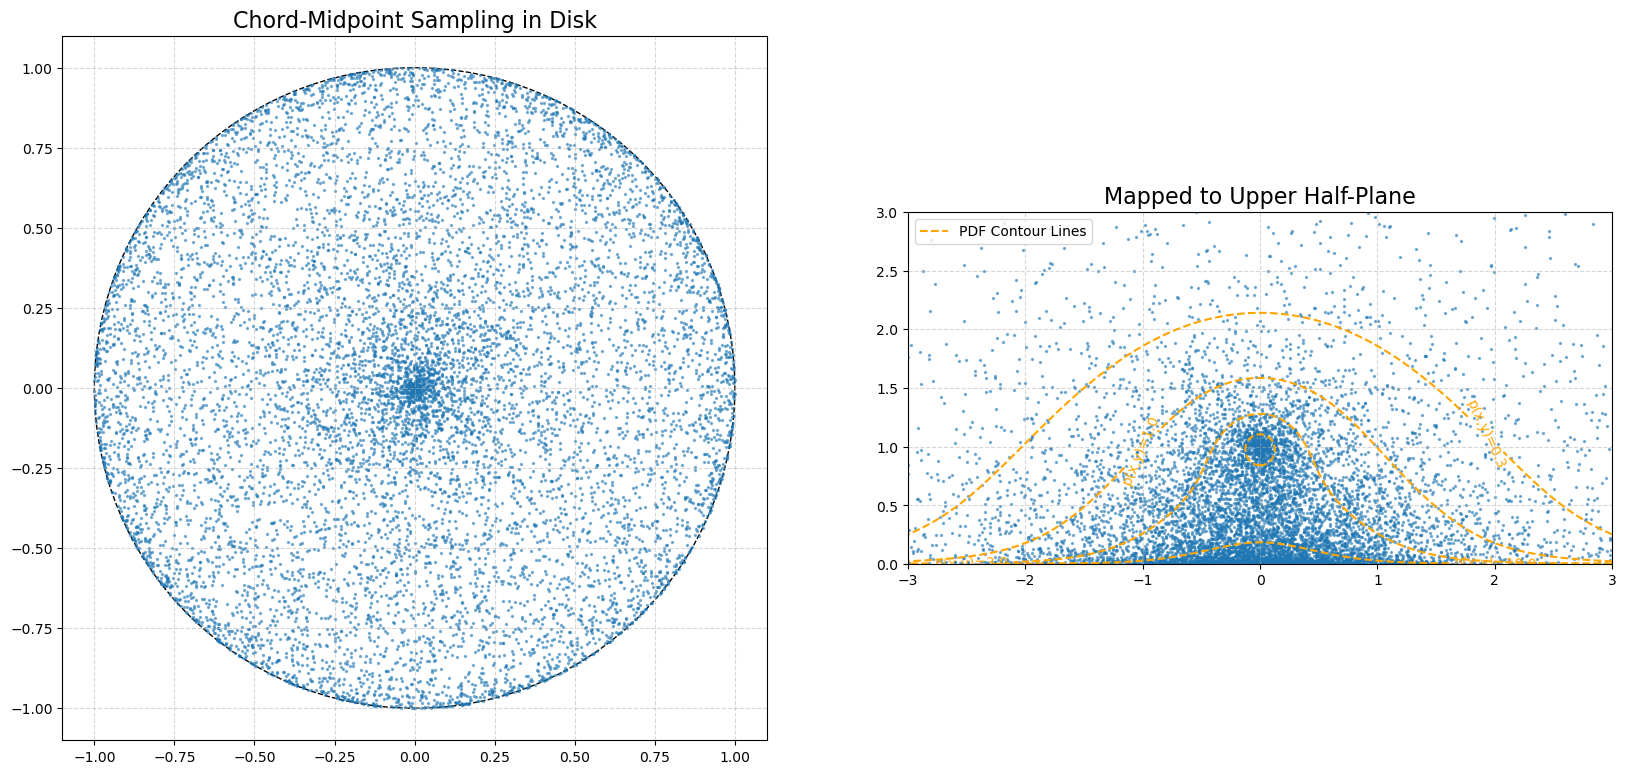

In [12]:
NUM_POINTS = 10000

# 1. 用弦中点法在圆盘采样
z_mid_disk = sample_disk_midchord(NUM_POINTS)

# 2. 映射到上半平面
z_mid_hp = map_disk_to_hp(z_mid_disk)

# 3. 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Chord-Midpoint Sampling in Disk', fontsize=16)
unit_circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='--')
ax1.add_artist(unit_circle)
ax1.scatter(z_mid_disk.real, z_mid_disk.imag, s=2, alpha=0.5)
ax1.set_aspect('equal')
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.set_title('Mapped to Upper Half-Plane', fontsize=16)
ax2.scatter(z_mid_hp.real, z_mid_hp.imag, s=2, alpha=0.5)
ax2.set_xlim(-3, 3)
ax2.set_ylim(0, 3)
ax2.set_aspect('equal')
ax2.grid(True, linestyle='--', alpha=0.5)

# plt.suptitle("Chord Midpoint Sampling vs. Its Image in Upper Half-Plane", fontsize=20)
# plt.show()

# ================= 新增功能：绘制等概率线 =================
# 1. 创建网格
x_grid = np.linspace(-3, 3, 400)
y_grid = np.linspace(0.001, 3, 400)
X, Y = np.meshgrid(x_grid, y_grid)

# 2. 在网格上计算新的 PDF 值
Z = pdf_midchord_hp(X, Y)

# 3. 设定等高线水平 (这些值可能需要微调以获得最佳可视化效果)
# 这个分布在 y->0 时密度极高，所以等高线值可以选得大一些
contour_levels = [0.3,1 ,3, 10]

# 4. 绘制等高线
CS = ax2.contour(X, Y, Z, levels=contour_levels, colors='orange', linestyles='dashed')
ax2.clabel(CS, inline=True, fontsize=10, fmt='p(x,y)=%.1f')

ax2.plot([], [], color='orange', linestyle='dashed', label='PDF Contour Lines')
ax2.legend()
# =========================================================

plt.show()


# 均匀角度和半径采样

In [13]:
from different_methods import sample_disk_uniform_radius

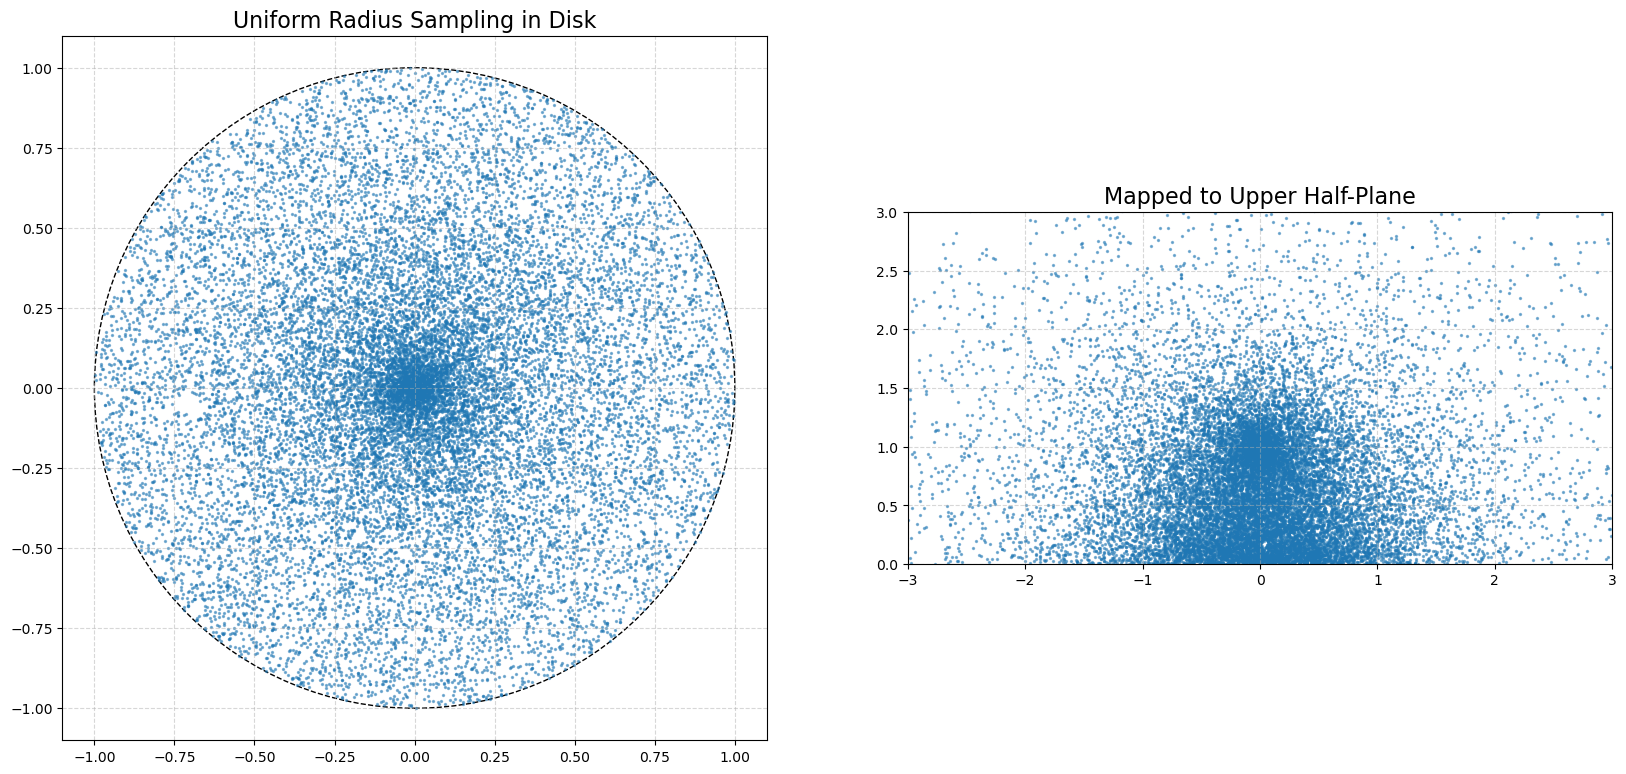

In [15]:
NUM_POINTS = 20000

# 1. 用弦中点法在圆盘采样
z_mid_disk = sample_disk_uniform_radius(NUM_POINTS)

# 2. 映射到上半平面
z_mid_hp = map_disk_to_hp(z_mid_disk)

# 3. 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Uniform Radius Sampling in Disk', fontsize=16)
unit_circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='--')
ax1.add_artist(unit_circle)
ax1.scatter(z_mid_disk.real, z_mid_disk.imag, s=2, alpha=0.5)
ax1.set_aspect('equal')
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.set_title('Mapped to Upper Half-Plane', fontsize=16)
ax2.scatter(z_mid_hp.real, z_mid_hp.imag, s=2, alpha=0.5)
ax2.set_xlim(-3, 3)
ax2.set_ylim(0, 3)
ax2.set_aspect('equal')
ax2.grid(True, linestyle='--', alpha=0.5)

# plt.suptitle("Chord Midpoint Sampling vs. Its Image in Upper Half-Plane", fontsize=20)
# plt.show()


plt.show()


# 原始方法，生成随机分数

In [1]:
import random
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt

# -------- 1. 生成随机分数 ----------
def random_fraction(max_abs_num=10000, max_den=10000):
    p = random.randint(-max_abs_num, max_abs_num)
    q = random.randint(1, max_den)
    return Fraction(p, q)

def sample_hp_fractions(n_points=5000,
                        max_abs_num=10000, max_den=10000,
                        ):
    """
    用随机分数构造上半平面中的点：
      x = 分数
      y = 分数(正) + y_min
    """
    xs, ys = [], []
    for _ in range(n_points):
        x = float(random_fraction(max_abs_num, max_den))
        y = abs(float(random_fraction(max_abs_num, max_den))) 
        xs.append(x)
        ys.append(y)
    return np.array(xs) + 1j * np.array(ys)


# -------- 2. 上半平面 -> 圆盘 -----------
def map_hp_to_disk(w):
    """
    上半平面到庞加莱圆盘的 Möbius 变换:
        z = (w - i) / (w + i)
    """
    return (w - 1j) / (w + 1j)



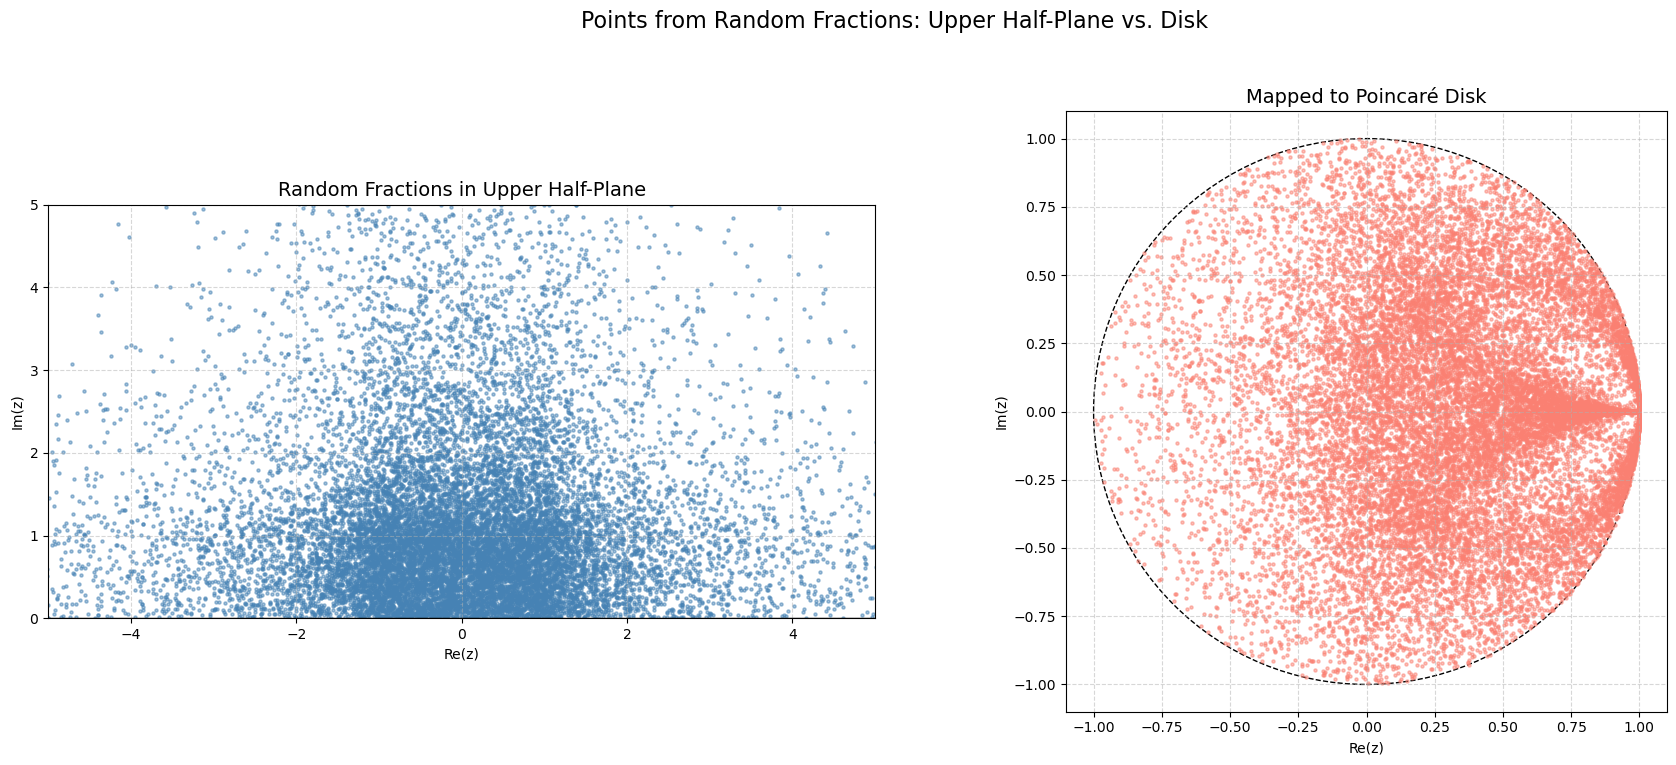

In [2]:
# -------- 3. 主程序 ----------

NUM_POINTS = 20000

# 生成上半平面中的点（分数）
z_hp_frac = sample_hp_fractions(NUM_POINTS, max_abs_num=500, max_den=500)

# 映射到圆盘
z_disk_frac = map_hp_to_disk(z_hp_frac)

# -------- 4. 可视化 ----------
fig, (ax_hp, ax_disk) = plt.subplots(1, 2, figsize=(18, 8))

# 左：上半平面
ax_hp.set_title("Random Fractions in Upper Half-Plane", fontsize=14)
ax_hp.scatter(z_hp_frac.real, z_hp_frac.imag, s=5, alpha=0.5, color='steelblue')
ax_hp.axhline(0, color='black', linewidth=1)
ax_hp.set_xlabel("Re(z)")
ax_hp.set_ylabel("Im(z)")
ax_hp.set_xlim(-5, 5)
ax_hp.set_ylim(0, 5)
ax_hp.grid(True, linestyle="--", alpha=0.5)
ax_hp.set_aspect("equal", adjustable="box")

# 右：映射到圆盘
ax_disk.set_title("Mapped to Poincaré Disk", fontsize=14)
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax_disk.add_artist(unit_circle)
ax_disk.scatter(z_disk_frac.real, z_disk_frac.imag, s=5, alpha=0.5, color='salmon')
ax_disk.set_xlabel("Re(z)")
ax_disk.set_ylabel("Im(z)")
ax_disk.set_xlim(-1.1, 1.1)
ax_disk.set_ylim(-1.1, 1.1)
ax_disk.set_aspect("equal", adjustable="box")
ax_disk.grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Points from Random Fractions: Upper Half-Plane vs. Disk", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()